# Instruction-tuning

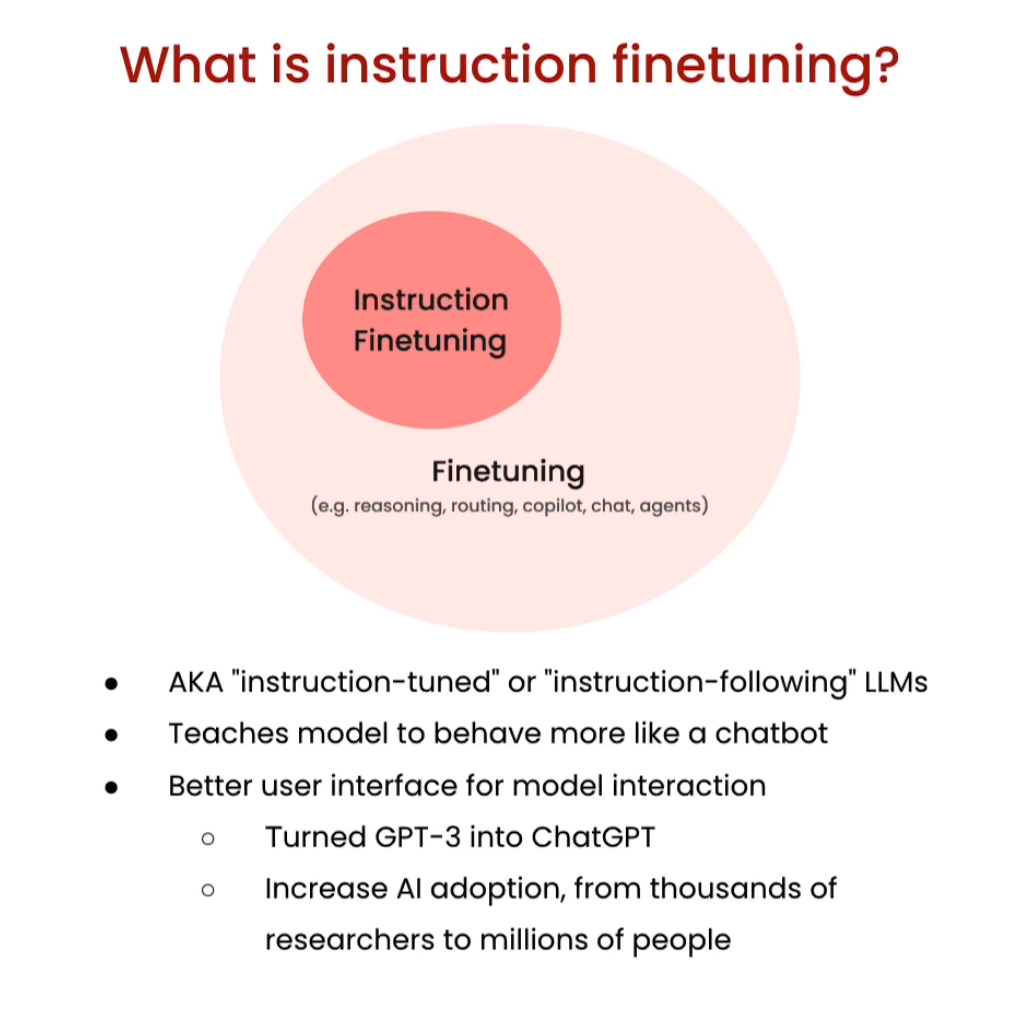

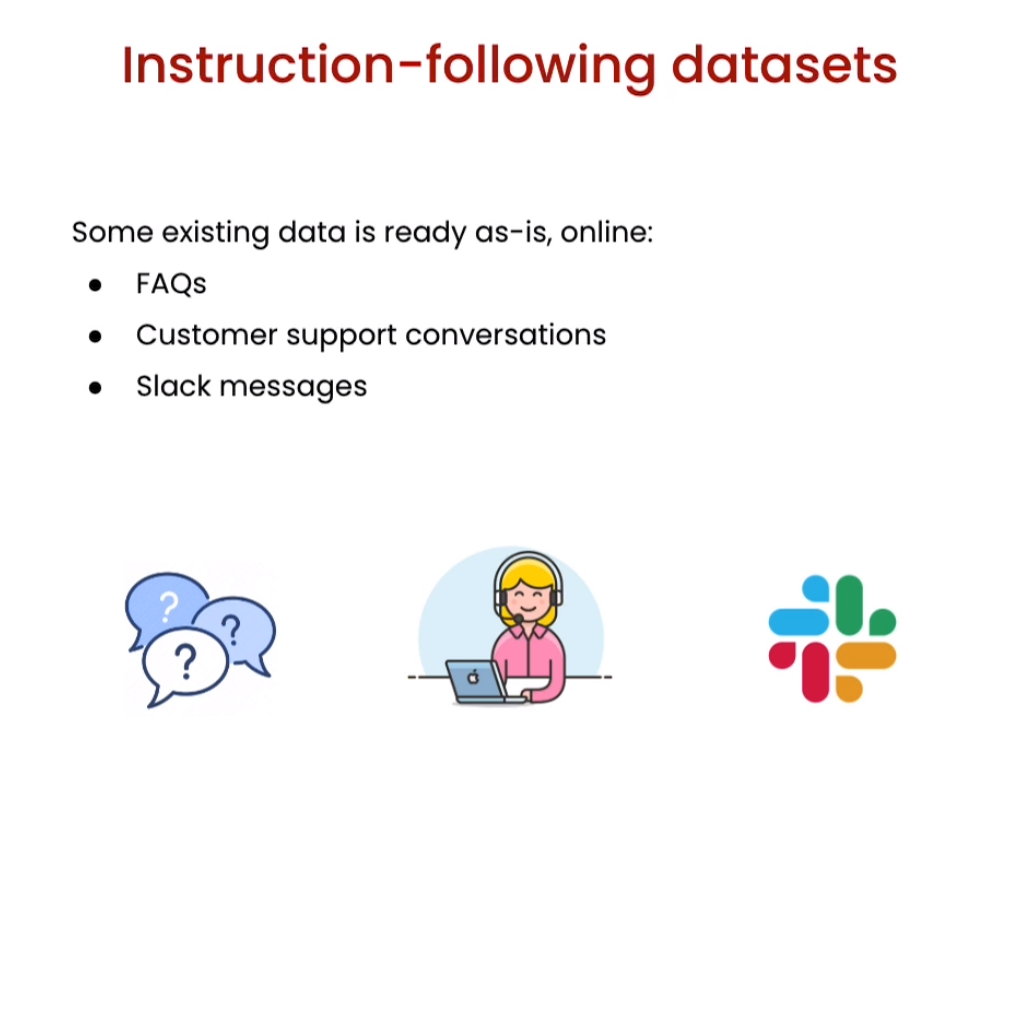

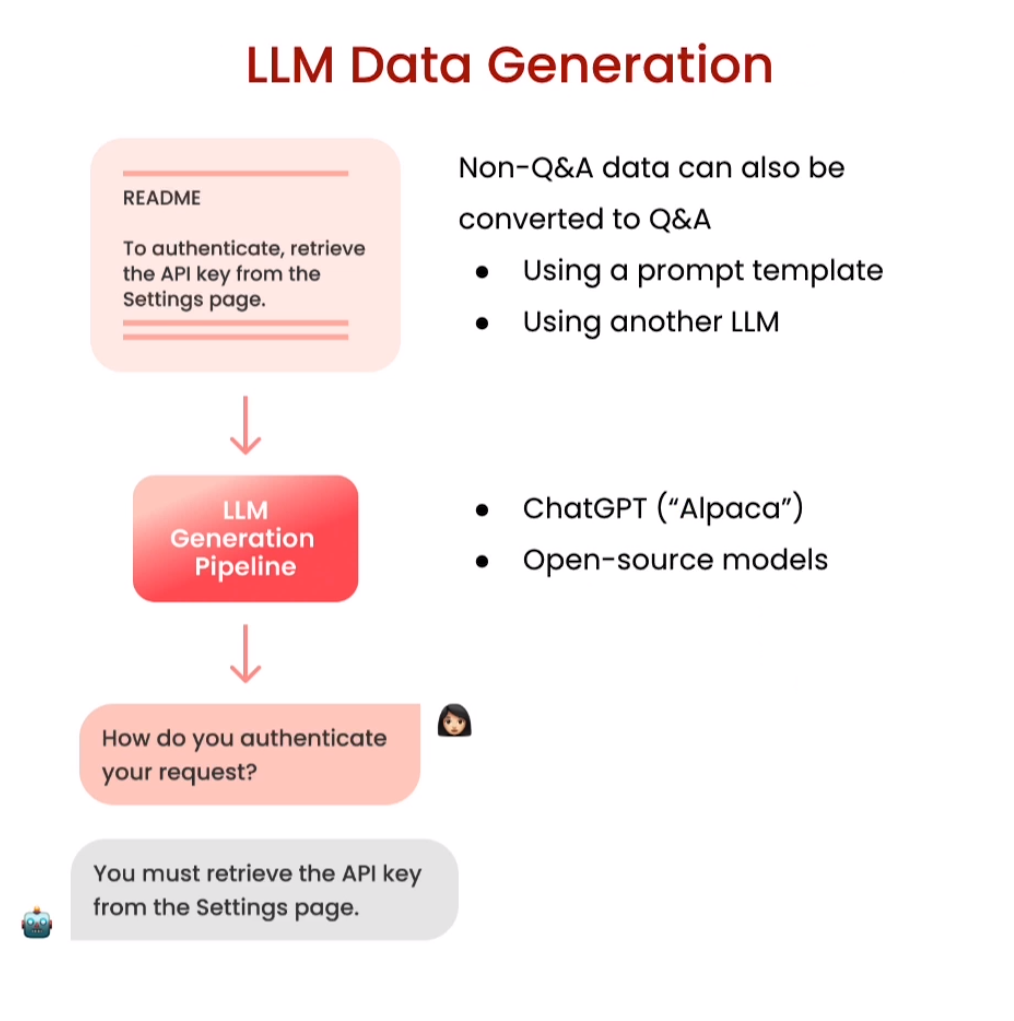

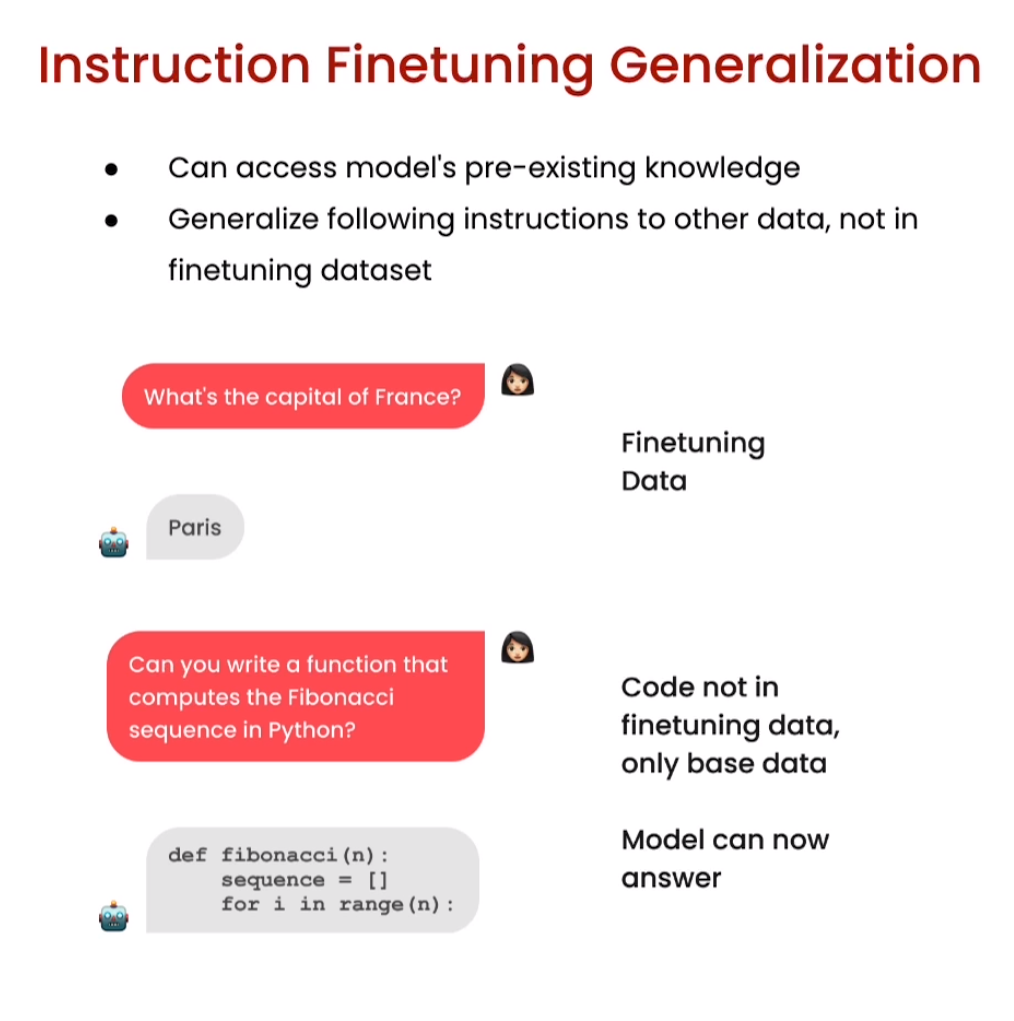

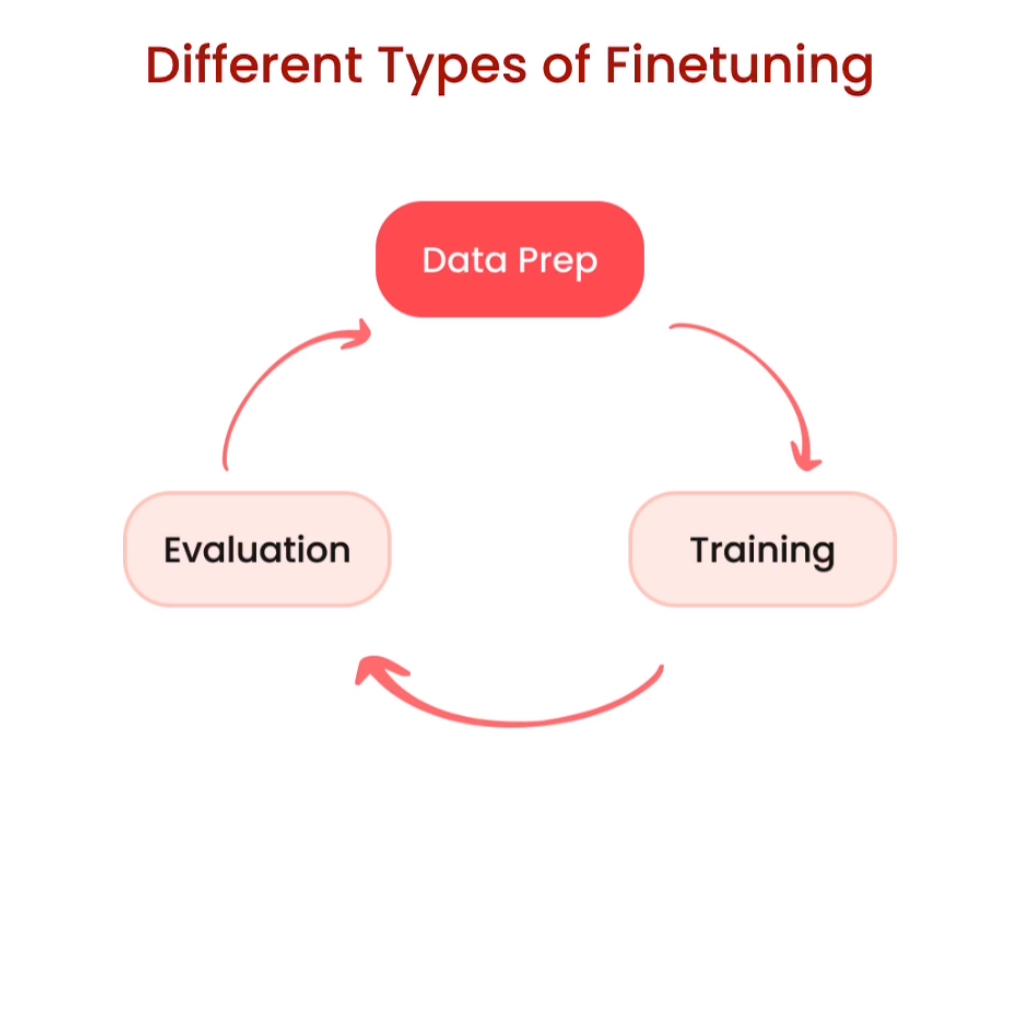

In [ ]:
import os
import lamini

lamini.api_url = os.getenv("POWERML__PRODUCTION__URL")
lamini.api_key = os.getenv("POWERML__PRODUCTION__KEY")

In [ ]:
import itertools
import jsonlines

from datasets import load_dataset
from pprint import pprint

from llama import BasicModelRunner
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

### Load instruction tuned dataset

In [ ]:
instruction_tuned_dataset = load_dataset("tatsu-lab/alpaca", split="train", streaming=True)

In [ ]:
m = 5
print("Instruction-tuned dataset:")
top_m = list(itertools.islice(instruction_tuned_dataset, m))
for j in top_m:
  print(j)

Instruction-tuned dataset:
{'instruction': 'Give three tips for staying healthy.', 'input': '', 'output': '1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.', 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nGive three tips for staying healthy.\n\n### Response:\n1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. \n2. Exercise regularly to keep your body active and strong. \n3. Get enough sleep and maintain a consistent sleep schedule.'}
{'instruction': 'What are the three primary colors?', 'input': '', 'output': 'The three primary colors are red, blue, and yellow.', 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nWhat are the three p

### Two prompt templates

In [ ]:
prompt_template_with_input = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Input:
{input}

### Response:"""

prompt_template_without_input = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{instruction}

### Response:"""

### Hydrate prompts (add data to prompts)

In [ ]:
processed_data = []
for j in top_m:
  if not j["input"]:
    processed_prompt = prompt_template_without_input.format(instruction=j["instruction"])
  else:
    processed_prompt = prompt_template_with_input.format(instruction=j["instruction"], input=j["input"])

  processed_data.append({"input": processed_prompt, "output": j["output"]})


In [ ]:
pprint(processed_data[0])

{'input': 'Below is an instruction that describes a task. Write a response '
          'that appropriately completes the request.\n'
          '\n'
          '### Instruction:\n'
          'Give three tips for staying healthy.\n'
          '\n'
          '### Response:',
 'output': '1.Eat a balanced diet and make sure to include plenty of fruits '
           'and vegetables. \n'
           '2. Exercise regularly to keep your body active and strong. \n'
           '3. Get enough sleep and maintain a consistent sleep schedule.'}


### Save data to jsonl

In [ ]:
with jsonlines.open(f'alpaca_processed.jsonl', 'w') as writer:
    writer.write_all(processed_data)

### Compare non-instruction-tuned vs. instruction-tuned models

In [ ]:
dataset_path_hf = "lamini/alpaca"
dataset_hf = load_dataset(dataset_path_hf)
print(dataset_hf)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input', 'output'],
        num_rows: 52002
    })
})


In [ ]:
non_instruct_model = BasicModelRunner("meta-llama/Llama-2-7b-hf")
non_instruct_output = non_instruct_model("Tell me how to train my dog to sit")
print("Not instruction-tuned output (Llama 2 Base):", non_instruct_output)

LAMINI CONFIGURATION
{}
LAMINI CONFIGURATION
{}
LAMINI CONFIGURATION
{}
Not instruction-tuned output (Llama 2 Base): .
Tell me how to train my dog to sit. I have a 10 month old puppy and I want to train him to sit. I have tried the treat method and he just sits there and looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks at me like I am crazy. I have tried the "sit" command and he just looks


In [ ]:
instruct_model = BasicModelRunner("meta-llama/Llama-2-7b-chat-hf")
instruct_output = instruct_model("Tell me how to train my dog to sit")
print("Instruction-tuned output (Llama 2): ", instruct_output)

LAMINI CONFIGURATION
{}
LAMINI CONFIGURATION
{}
LAMINI CONFIGURATION
{}
Instruction-tuned output (Llama 2):   on command.
Training a dog to sit on command is a basic obedience command that can be achieved with patience, consistency, and positive reinforcement. Here's a step-by-step guide on how to train your dog to sit on command:

1. Choose a quiet and distraction-free area: Find a quiet area with minimal distractions where your dog can focus on you.
2. Have treats ready: Choose your dog's favorite treats and have them ready to use as rewards.
3. Stand in front of your dog: Stand in front of your dog and hold a treat close to their nose.
4. Move the treat up and back: Slowly move the treat up and back, towards your dog's tail, while saying "sit" in a calm and clear voice.
5. Dog will sit: As you move the treat, your dog will naturally sit down to follow the treat. The moment their bottom touches the ground, say "good sit" and give them the treat.
6. Repeat the process: Repeat steps 3-

In [ ]:
chatgpt = BasicModelRunner("chat-gpt")
instruct_output_chatgpt = chatgpt("Tell me how to train my dog to sit")
print("Instruction-tuned output (ChatGPT): ", instruct_output_chatgpt)

LAMINI CONFIGURATION
{}
LAMINI CONFIGURATION
{}
LAMINI CONFIGURATION
{}
Instruction-tuned output (ChatGPT):  Training a dog to sit is a basic command that can be taught using positive reinforcement techniques. Here's a step-by-step guide on how to train your dog to sit:

1. Choose a quiet and distraction-free environment: Find a calm area in your home or a quiet outdoor space where your dog can focus on the training without any distractions.

2. Gather treats: Use small, soft, and tasty treats that your dog loves. These treats will serve as rewards during the training process.

3. Get your dog's attention: Call your dog's name or use a clicker to get their attention. Make sure they are looking at you before proceeding.

4. Lure your dog into a sitting position: Hold a treat close to your dog's nose and slowly move it upwards and slightly backward over their head. As their nose follows the treat, their bottom will naturally lower into a sitting position. Once they are sitting, say "sit"

### Try smaller models

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-70m")

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/166M [00:00<?, ?B/s]

In [ ]:
def inference(text, model, tokenizer, max_input_tokens=1000, max_output_tokens=100):
  # Tokenize
  input_ids = tokenizer.encode(
          text,
          return_tensors="pt",
          truncation=True,
          max_length=max_input_tokens
  )

  # Generate
  device = model.device
  generated_tokens_with_prompt = model.generate(
    input_ids=input_ids.to(device),
    max_length=max_output_tokens
  )

  # Decode
  generated_text_with_prompt = tokenizer.batch_decode(generated_tokens_with_prompt, skip_special_tokens=True)

  # Strip the prompt
  generated_text_answer = generated_text_with_prompt[0][len(text):]

  return generated_text_answer

In [ ]:
finetuning_dataset_path = "lamini/lamini_docs"
finetuning_dataset = load_dataset(finetuning_dataset_path)
print(finetuning_dataset)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/140 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1260
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 140
    })
})


In [ ]:
test_sample = finetuning_dataset["test"][0]
print(test_sample)

print(inference(test_sample["question"], model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


{'question': 'Can Lamini generate technical documentation or user manuals for software projects?', 'answer': 'Yes, Lamini can generate technical documentation and user manuals for software projects. It uses natural language generation techniques to create clear and concise documentation that is easy to understand for both technical and non-technical users. This can save developers a significant amount of time and effort in creating documentation, allowing them to focus on other aspects of their projects.', 'input_ids': [5804, 418, 4988, 74, 6635, 7681, 10097, 390, 2608, 11595, 84, 323, 3694, 6493, 32, 4374, 13, 418, 4988, 74, 476, 6635, 7681, 10097, 285, 2608, 11595, 84, 323, 3694, 6493, 15, 733, 4648, 3626, 3448, 5978, 5609, 281, 2794, 2590, 285, 44003, 10097, 326, 310, 3477, 281, 2096, 323, 1097, 7681, 285, 1327, 14, 48746, 4212, 15, 831, 476, 5321, 12259, 247, 1534, 2408, 273, 673, 285, 3434, 275, 6153, 10097, 13, 6941, 731, 281, 2770, 327, 643, 7794, 273, 616, 6493, 15], 'attention

### Compare to finetuned small model

In [ ]:
instruction_model = AutoModelForCausalLM.from_pretrained("lamini/lamini_docs_finetuned")

config.json:   0%|          | 0.00/717 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/282M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
print(inference(test_sample["question"], instruction_model, tokenizer))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Yes, Lamini can generate technical documentation or user manuals for software projects. This can be achieved by providing a prompt for a specific technical question or question to the LLM Engine, or by providing a prompt for a specific technical question or question. Additionally, Lamini can be trained on specific technical questions or questions to help users understand the process and provide feedback to the LLM Engine. Additionally, Lamini


In [ ]:
# Pssst! If you were curious how to upload your own dataset to Huggingface
# Here is how we did it

# !pip install huggingface_hub
# !huggingface-cli login

# import pandas as pd
# import datasets
# from datasets import Dataset

# finetuning_dataset = Dataset.from_pandas(pd.DataFrame(data=finetuning_dataset))
# finetuning_dataset.push_to_hub(dataset_path_hf)